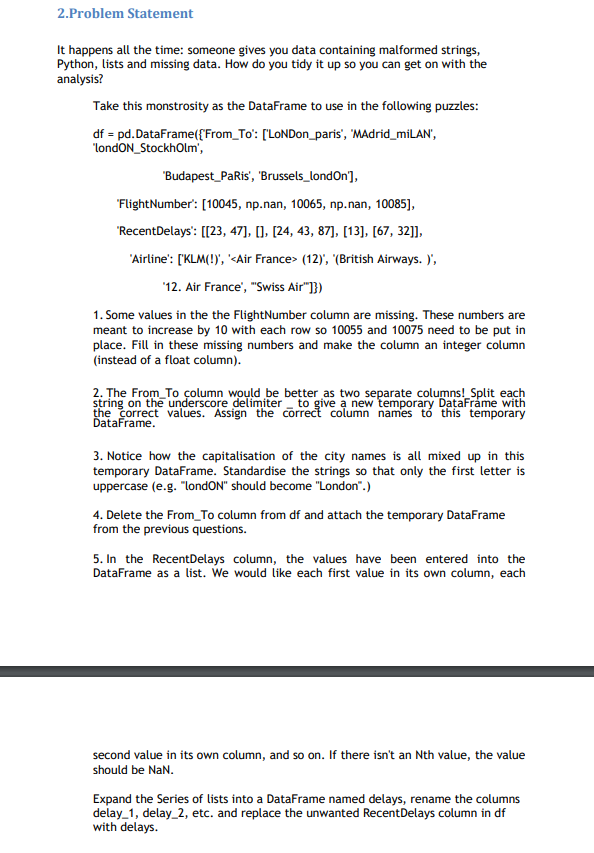

In [ ]:
import pandas as pd
import numpy as np

In [33]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})

In [34]:
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


**1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column
(instead of a float column)**


In [35]:

df.dtypes

From_To          object
FlightNumber    float64
RecentDelays     object
Airline          object
dtype: object

In [36]:
df['FlightNumber'].fillna(value = {1: 10055.00, 3: 10075.00}, inplace = True)

In [37]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [38]:
df.astype({'FlightNumber':'int32'})

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


**Both 2nd and 4th point covered together**

**2. The From_To column would be better as two separate columns! Split each
string on the underscore delimiter _ to give a new temporary DataFrame with
the correct values. Assign the correct column names to this temporary
DataFrame.                                                                    4. Delete the From_To column from df and attach the temporary DataFrame
from the previous questions**

In [39]:
new_df = pd.DataFrame(df.From_To.str.split('_').tolist(), columns = ['From','To'])

In [26]:
new_df.head()

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [40]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [ ]:
final_df = df.join(new_df)

In [45]:
final_df.drop('From_To', axis = 1, inplace = True)

In [46]:
final_df.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),LoNDon,paris
1,10055.0,[],<Air France> (12),MAdrid,miLAN
2,10065.0,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075.0,[13],12. Air France,Budapest,PaRis
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,londOn


**3. Notice how the capitalisation of the city names is all mixed up in this
temporary DataFrame. Standardise the strings so that only the first letter is
uppercase (e.g. "londON" should become "London".)** 

In [54]:
final_df['From'] = final_df['From'].str.capitalize()

In [55]:
final_df['To'] = final_df['To'].str.capitalize()

In [56]:
final_df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,10055.0,[],<Air France> (12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075.0,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London


 **5. In the RecentDelays column, the values have been entered into the
DataFrame as a list. We would like each first value in its own column, each 
second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.Expand the Series of lists into a DataFrame named delays, rename the columns
delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df
with delays.**


In [72]:
recendelay_df = (pd.DataFrame(final_df['RecentDelays'].values.tolist(), index=final_df.index).rename(columns = lambda x: 'delay_{}'.format(x+1)))

In [73]:
recendelay_df.head()

,Delay1,Delay2,Delay3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [79]:
combined_df = final_df.join(recendelay_df)
combined_df.drop('RecentDelays', axis =1)

,FlightNumber,Airline,From,To,Delay1,Delay2,Delay3
0,10045.0,KLM(!),London,Paris,23.0,47.0,NaN
1,10055.0,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065.0,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075.0,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085.0,"""Swiss Air""",Brussels,London,67.0,32.0,NaN
